In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os, json
%matplotlib inline

/Users/crankshaw/anaconda2/envs/clipper/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
def analyze_run(t):
    accs = []
    thrus = []
    mean_lats = []
    p99_lats = []
    max_lats = []
    # throw out first trial to let things warm up
    for i in range(1, len(t)):
        sp = t[i].split(", ")
        accs.append(float(sp[0]))
        thrus.append(float(sp[1]))
        mean_lats.append(float(sp[2]))
        p99_lats.append(float(sp[3]))
        max_lats.append(float(sp[4]))

    acc_m, acc_err = np.mean(accs), np.std(accs)/(np.sqrt(len(t) - 1))
    thrus_m, thrus_err = np.mean(thrus), np.std(thrus)/(np.sqrt(len(t) - 1))
    mean_lats_m, mean_lats_err = np.mean(mean_lats), np.std(mean_lats)/(np.sqrt(len(t) - 1))
    p99_lats_m, p99_lats_err = np.mean(p99_lats), np.std(p99_lats)/(np.sqrt(len(t) - 1))
    max_lats_m, max_lats_err = np.mean(max_lats), np.std(max_lats)/(np.sqrt(len(t) - 1))
    return acc_m, acc_err, thrus_m, thrus_err, mean_lats_m, mean_lats_err, p99_lats_m, p99_lats_err, max_lats_m, max_lats_err

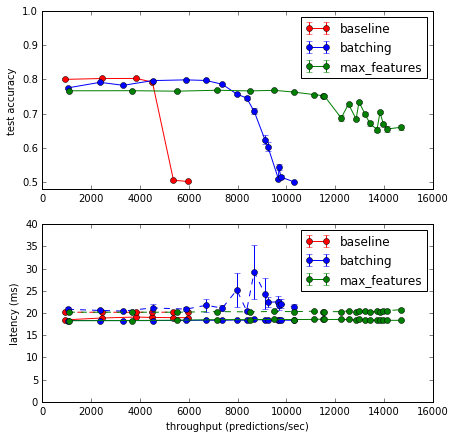

In [46]:
path = os.path.abspath("../clipper_server/experiments_RAW/end_to_end_THRUPUT")
# plt.figure(figsize=(5,8))
fig, (ax_acc, ax_lat) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False)
colors = ["r", "b", "g"]
i = 0
for fname in os.listdir(path):
    runs = []
    with open(os.path.join(path,fname), "rb") as rf:
        cur_exp = None
        for line in rf:
            if line.startswith("EXPERIMENT"):
                if cur_exp is not None:
                    runs.append(cur_exp)
                cur_exp = []
            elif line.startswith("0."):
                cur_exp.append(line.strip())
        runs.append(cur_exp)

    acc_m, acc_err, thrus_m, thrus_err, mean_lats_m, mean_lats_err, p99_lats_m, p99_lats_err, max_lats_m, max_lats_err = zip(*[analyze_run(r) for r in runs])
    acc_m = np.array(acc_m)
    acc_err = np.array(acc_err)
    thrus_m = np.array(thrus_m)
    thrus_err = np.array(thrus_err)
    mean_lats_m = np.array(mean_lats_m)
    mean_lats_err = np.array(mean_lats_err)
    p99_lats_m = np.array(p99_lats_m)
    p99_lats_err = np.array(p99_lats_err)
    max_lats_m = np.array(max_lats_m)
    max_lats_err = np.array(max_lats_err)

    ts = np.array(np.argsort(thrus_m))
    label = fname[:-4]
    c = colors[i % len(colors)]
    ax_acc.errorbar(thrus_m[ts], acc_m[ts], yerr=acc_err[ts], fmt="%so-" % c, label="%s" % label)

#     ax_lat = plt.subplot(212, sharex=ax_acc)
    #ax_lat = ax_acc.twinx()
    ax_lat.errorbar(thrus_m[ts], mean_lats_m[ts], yerr=mean_lats_err[ts], fmt="%so-" % c, label="%s" % label)
    ax_lat.errorbar(thrus_m[ts], p99_lats_m[ts], yerr=p99_lats_err[ts], fmt="%so--" % c)
#     ax_lat.errorbar(thrus_m[ts], p99_lats_m[ts], yerr=p99_lats_err[ts], fmt="%so--" % c, label="%s p99" % label)

    
    i += 1

fig.set_size_inches(7,7)
ax_acc.set_ylabel("test accuracy")
ax_acc.set_ylim((0.48, 1.0))
ax_acc.legend(loc=0)
ax_lat.set_ylabel("latency (ms)")
ax_lat.set_xlabel("throughput (predictions/sec)")
ax_lat.legend(loc=0)
ax_lat.set_ylim((0, 40))
fig.tight_layout
ax_acc.set_xticklabels(range(0, 16001, 2000), visible=True)
ax_lat.set_xticklabels(range(0, 16001, 2000), visible=True)
# ax_lat.set_xticklabels(ax_lat.get_xticklabels(), visible=True)
plt.savefig("/Users/crankshaw/Dropbox/Apps/ShareLaTeX/velox-centipede/vldb_2016/figs/endtoendeval.pdf")
plt.show()